Switching dynamics at t = 432
switch time = 432
432


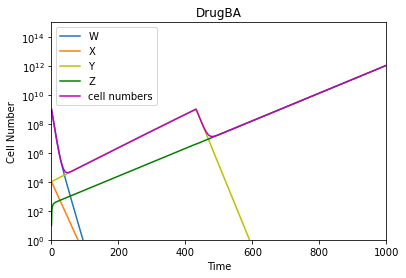

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def dyna(x, t, *arg):
    (qxw, pxw, qzw, pzw, qzx, pzx, qzy, pzy, a, b, c, f, g, h, k, p, q ) = arg
    dw = ((qxw*(x[1]/(x[0]+α)))/(pxw+(x[1]/(x[0]+α))) + ((qzw*(x[3]/(x[0]+α)))/(pzw+(x[3]/(x[0]+α))))+a)*x[0] 
    dx = g*x[0] + (((qzx*(x[3]/(x[1]+α)))/(pzx+(x[3]/(x[1]+α))))+b)*x[1]
    dy = h*x[0] + (((qzy*(x[3]/(x[2]+α)))/(pzy+(x[3]/(x[2]+α))))+c)*x[2]
    dz = k*x[0] + p*x[1] + q*x[2] + f*x[3]
    return np.array([dw, dx, dy, dz])

def dynb(x, t, *arg):
    (qyw, pyw, qzw, pzw, qzx, pzx, qzy, pzy, a, b, c, f, g, h, k, p, q ) = arg
    dw = ((qyw*(x[2]/(x[0]+α)))/(pyw+(x[2]/(x[0]+α))) + ((qzw*(x[3]/(x[0]+α)))/(pzw+(x[3]/(x[0]+α))))+a)*x[0] 
    dx = g*x[0] + (((qzx*(x[3]/(x[1]+α)))/(pzx+(x[3]/(x[1]+α))))+b)*x[1]
    dy = h*x[0] + (((qzy*(x[3]/(x[2]+α)))/(pzy+(x[3]/(x[2]+α))))+c)*x[2]
    dz = k*x[0] + p*x[1] + q*x[2] + f*x[3]
    return np.array([dw, dx, dy, dz])

α = 0.00000001

qxw = 0.08
pxw = 0.0009
qyw = 0.08
pyw = 0.0009

qzw = 0.06
pzw = 0.0009
qzx = 0.07
pzx = 0.0009
qzy = 0.007
pzy = 0.0009

aA = -0.17
bA = 0.008
cA = -0.137

aB = -0.321
bB = -0.187
cB = 0.0203

f = 0.022
g = 0.0000001
h = 0.0000001 
k = 0.0000001 
p = 0.0000001 
q = 0.0000001

initial_N = 10**9
X = 10**4
Y = 10**4
Z = 10
W = initial_N - X - Y - Z
cell_init = (W, X, Y, Z)

paramsA = (qxw, pxw, qzw, pzw, qzx, pzx, qzy, pzy, aA, bA, cA, f, g, h, k, p, q )
paramsB = (qyw, pyw, qzw, pzw, qzx, pzx, qzy, pzy, aB, bB, cB, f, g, h, k, p, q )

t_end = 1000
# switch_time = float('inf')
list_t = []
list_t1 = []
time_points = []

# wcell = []
# xcell = []
# ycell = []
# zcell = []
# Total = []
switch_triggered = False

for t in range(1, t_end+1, 1):
    time_points.append(t)
    list_t = np.arange(0, t, 1)
    cells = odeint(dyna, cell_init, list_t, args=paramsB)
    celltotal = cells[:, 0] + cells[:, 1] + cells[:, 2] + cells[:, 3]
    if not switch_triggered and celltotal[-1] > initial_N:
        switch_time = t
        print("Switching dynamics at t =", switch_time)
        switch_triggered = True
        
# switch_time = 432
print ('switch time =', switch_time)
list_t = np.arange(0, switch_time, 1) 
list_t1 = np.arange(switch_time, t_end, 1)
# paramsA = (qxw, pxw, qzw, pzw, qzx, pzx, qzy, pzy, aA, bA, cA, f, g, h, k, p, q )
# cell_init = (W,X,Y,Z)

cells = odeint(dyna, cell_init, list_t, args = paramsB)
celltotal = cells[:, 0] + cells[:, 1] + cells[:, 2] + cells[:, 3]       
i = len(list_t)-1  
print (len(list_t))
cell1_init = [cells[i, 0], cells[i, 1], cells[i, 2], cells[i, 3]]
paramsB = (qyw, pyw, qzw, pzw, qzx, pzx, qzy, pzy, aB, bB, cB, f, g, h, k, p, q )
cell1 = odeint(dynb, cell1_init, list_t1, args = paramsA)
celltotal1 = cell1[:, 0] + cell1[:, 1] + cell1[:, 2] + cell1[:, 3]
lastone = celltotal1[-1]

# list_t1 = np.arange(switch_time, t_end, 1)
# i = switch_time-1
# print ("switch tiem = ", i)
# cell1_init = [cells[i, 0], cells[i, 1], cells[i, 2], cells[i, 3]]
# cell1 = odeint(dynb, cell1_init, list_t1, args = paramsB)
# celltotal1 = cell1[:, 0] + cell1[:, 1] + cell1[:, 2] + cell1[:, 3]

fig, ax = plt.subplots()
# ax.plot(time_points, np.hstack((cells[:, 0], cells1[:, 0])), label='W')
# ax.plot(time_points, np.hstack((cells[:, 1], cells1[:, 1])), label='X')
# ax.plot(time_points, np.hstack((cells[:, 2], cells1[:, 2])), 'y', label='Y')
# ax.plot(time_points, np.hstack((cells[:, 3], cells1[:, 3])), 'g', label='Z')
# ax.plot(np.hstack((list_t, list_t1)), np.hstack((celltotal, celltotal1)), 'm', label='Total')

ax.plot(np.hstack((list_t, list_t1)), np.hstack((cells[:, 0], cell1[:, 0])), label='W')
ax.plot(np.hstack((list_t, list_t1)), np.hstack((cells[:, 1], cell1[:, 1])), label='X')
ax.plot(np.hstack((list_t, list_t1)), np.hstack((cells[:, 2], cell1[:, 2])), 'y', label='Y')
ax.plot(np.hstack((list_t, list_t1)), np.hstack((cells[:, 3], cell1[:, 3])), 'g', label='Z')
ax.plot(np.hstack((list_t, list_t1)), np.hstack((celltotal, celltotal1)), 'm', label='cell numbers')

# ax.plot(time_points, W_list, label='W')
# ax.plot(time_points, X_list, label='X')
# ax.plot(time_points, Y_list, 'y', label='Y')
# ax.plot(time_points, Z_list, 'g', label='Z')
# ax.plot(time_points, Total_list, 'm', label='Total')
ax.legend()
# ax = fig.add_subplot(111)
ax.set_yscale('log')
ax.set_xlim(0, 1000)
ax.set_ylim(1, 10**15)
# ax.set_ylim(10**6, 10**12)
ax.set_xlabel('Time')
ax.set_ylabel('Cell Number')
ax.set_title('DrugBA')

plt.show()